## 1. Load data, visualise it and identify erroneous values

 - Load the data from the csv file `breast_cancer.csv`.
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [36]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

#### 1.1 Load the data from the csv file `breast_cancer.csv` .

In [ ]:
# Your code here
df = pd.read_csv('breast_cancer.csv')
df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115


#### 1.2 Extract the feature names and label names for use later on.

In [38]:
features = df.columns[1:]
label = df.columns[0]

#### 1.3 Provide at least one text summary of the dataset. This should include key information and characteristics of the data.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

#### Observed Problem:
- The `mean radius` should be of a numeric data type.

#### Solution:
- Use `pd.to_numeric` to convert it to a numeric data type. If an error is encountered, the value will be converted to `np.nan`.


In [40]:
df['mean radius'] = pd.to_numeric(df['mean radius'], errors='coerce')

In [41]:
print("Value counts of the label:")
df['label'].value_counts()

Value counts of the label:


label
benign       154
malignant     65
maligant       1
Name: count, dtype: int64

#### Observed Problem:
- A typo "maligant" in the `label` column.

#### Solution:
- Use `replace` to correct the typo to "malignant".

In [42]:
df[label].replace("maligant", "malignant", inplace=True)

In [43]:
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
       mean radius  mean texture  mean perimeter    mean area  \
count   219.000000    220.000000      220.000000   220.000000   
mean     13.693313     18.991963       89.866240   620.956227   
std       2.176062      1.427635        7.366180   106.419871   
min     -14.292182     15.349270       74.690886    -2.645499   
25%      13.092060     17.914319       84.911981   558.731832   
50%      13.647143     18.928256       88.587737   603.806128   
75%      14.272883     19.995859       93.066393   655.690435   
max      18.200299     24.430831      121.247839  1103.740620   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       220.000000        220.000000      220.000000           220.000000   
mean          0.096480          0.102879        0.085281             0.046867   
std           0.004961          0.019819        0.026911             0.012548   
min           0.084651          0.075184        0.05077

#### Observed Problem:
- Negative values are present in the `mean radius` and `mean area` columns.
- Extreme values in the `mean fractal dimension` column.

#### Solution:
- Replace any values less than 0 in the `mean radius` and `mean area` columns with `np.nan`.
- Replace any values greater than 8 in the `mean fractal dimension` column with `np.nan`.


In [44]:
df.loc[df['mean radius'] < 0, 'mean radius'] = np.nan
df.loc[df['mean area'] < 0, 'mean area'] = np.nan
df.loc[df['mean fractal dimension'] > 8, 'mean fractal dimension'] = np.nan

#### 1.4 Create one graphical plot per feature. 

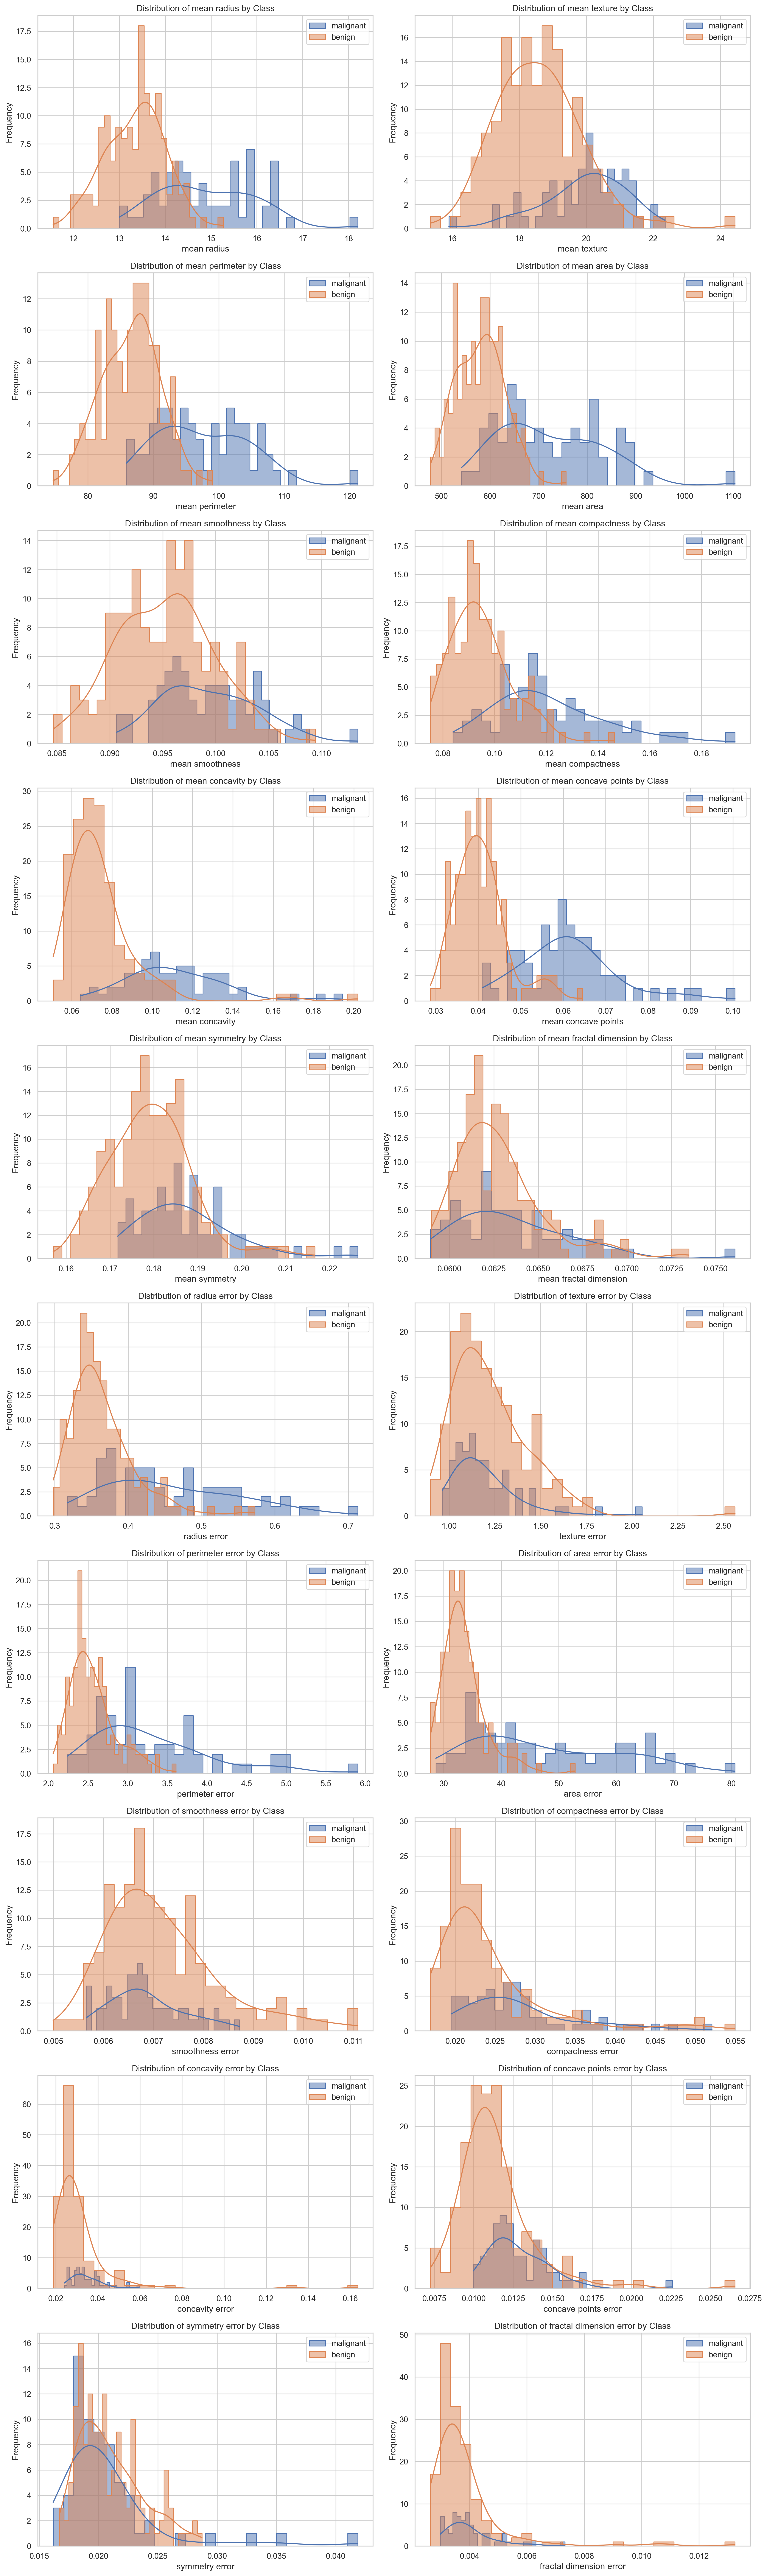

In [45]:
sns.set(style="whitegrid")

# Determine the number of rows needed for the subplots based on the number of features
n_features = len(features)
n_rows = (n_features + 1) // 2  # Now calculating rows for 2 columns

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5)) 
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each feature to create individual plots
for i, feature in enumerate(features):
    ax = axes[i]  # Get the current axis for the subplot
    for label_class in df[label].unique():
        subset = df[df[label] == label_class]
        sns.histplot(subset[feature], bins=30, kde=True, label=f'{label_class}', element="step", fill=True, ax=ax)
    
    ax.set_title(f'Distribution of {feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

# Turn off unused subplots if features do not perfectly fill the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



#### Data Cleaning Summary:
- Convert `mean radius` column to numeric types using `pd.to_numeric`. If conversion errors occur, values will be set to `np.nan`.
- Correct typos in the `label` column, replacing "maligant" with "malignant".
- Replace negative values in the `mean radius` and `mean area` columns with `np.nan`.
- Replace values greater than 8 in the `mean fractal dimension` column with `np.nan`.

## 2. Prepare data and models, and make baseline measurements
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [46]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold


f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

#### 2.1 Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.

In [47]:
# Your code here
X = df.drop('label', axis=1)
y = pd.Series([1 if i == "malignant" else 0 for i in df['label']]) # 1 for malignant, 0 for benign

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### 2.2 Create a Preprocessing Pipeline for the Data

In [48]:
preproc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) 
])

#### 2.3 Implement a the random prediction baseline model

In [49]:
from sklearn.base import BaseEstimator

class Random_Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, random_state=42):
        np.random.seed(random_state)
        return [np.random.choice([0, 1]) for i in range(X.shape[0])]

In [50]:
random_pl = Pipeline([
    ('preproc', preproc_pipeline), 
    ('random_clf', Random_Classifier()) 
])

#### 2.4 Create an evaluation metrics with stratified 10 fold cross validation.

In [65]:
def stratified_kfold_cv_and_metric(pipeline, X_train, y_train, model_name , n_splits=10, random_state=42):
    
    # Define the stratified K-fold cross-validator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Lists to store metrics for each fold
    accuracies, balanced_accuracies, recalls, precisions, f1_scores, auc_scores, f01_scores, f10_scores = ([] for _ in range(8))
    
    # Initialize arrays to store all true and predicted labels for confusion matrix
    y_true_all = np.array([], dtype=int)
    y_pred_all = np.array([], dtype=int)
    
    # Perform stratified K-fold cross-validation
    for train_index, test_index in skf.split(X_train, y_train):
        X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Fit the pipeline on the training fold
        pipeline.fit(X_fold_train, y_fold_train)
        
        # Predict on the test fold
        y_pred = pipeline.predict(X_fold_test)
        
        # Store the true and predicted labels for all folds
        y_true_all = np.concatenate([y_true_all, y_fold_test])
        y_pred_all = np.concatenate([y_pred_all, y_pred])
        
        # Evaluate the predictions for the current fold and accumulate results
        accuracies.append(accuracy_score(y_fold_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_fold_test, y_pred))
        recalls.append(recall_score(y_fold_test, y_pred, average='macro'))
        precisions.append(precision_score(y_fold_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_fold_test, y_pred, average='macro'))

        # Check if the model has predict_proba method and calculate AUC score
        if hasattr(pipeline, "predict_proba"):
            y_prob = pipeline.predict_proba(X_fold_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_fold_test, y_prob, pos_label=1)
            auc_scores.append(auc(fpr, tpr))
        else:
            auc_scores.append(roc_auc_score(y_fold_test, y_pred))
        
        # F-beta scores for beta=0.1 and beta=10
        f01_scores.append(fbeta_score(y_fold_test, y_pred, beta=0.1, average='macro'))
        f10_scores.append(fbeta_score(y_fold_test, y_pred, beta=10, average='macro'))
    
    print(f"Accuracy - Mean: {np.mean(accuracies):.4f}, SD: {np.std(accuracies):.4f}")
    print(f"Balanced Accuracy - Mean: {np.mean(balanced_accuracies):.4f}, SD: {np.std(balanced_accuracies):.4f}")
    print(f"Recall - Mean: {np.mean(recalls):.4f}, SD: {np.std(recalls):.4f}")
    print(f"Precision - Mean: {np.mean(precisions):.4f}, SD: {np.std(precisions):.4f}")
    print(f"F1 Score - Mean: {np.mean(f1_scores):.4f}, SD: {np.std(f1_scores):.4f}")
    print(f"AUC Score - Mean: {np.mean(auc_scores):.4f}, SD: {np.std(auc_scores):.4f}")
    print(f"F-beta Score (beta=0.1) - Mean: {np.mean(f01_scores):.4f}, SD: {np.std(f01_scores):.4f}")
    print(f"F-beta Score (beta=10) - Mean: {np.mean(f10_scores):.4f}, SD: {np.std(f10_scores):.4f}")

    # Plot the confusion matrix for all data collected across folds
    cm = confusion_matrix(y_true_all, y_pred_all)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



The Baseline Random Classifier Metrics:
Accuracy - Mean: 0.5450, SD: 0.1165
Balanced Accuracy - Mean: 0.4389, SD: 0.1366
Recall - Mean: 0.4389, SD: 0.1366
Precision - Mean: 0.4333, SD: 0.1483
F1 Score - Mean: 0.4350, SD: 0.1416
AUC Score - Mean: 0.4389, SD: 0.1366
F-beta Score (beta=0.1) - Mean: 0.4333, SD: 0.1482
F-beta Score (beta=10) - Mean: 0.4388, SD: 0.1367


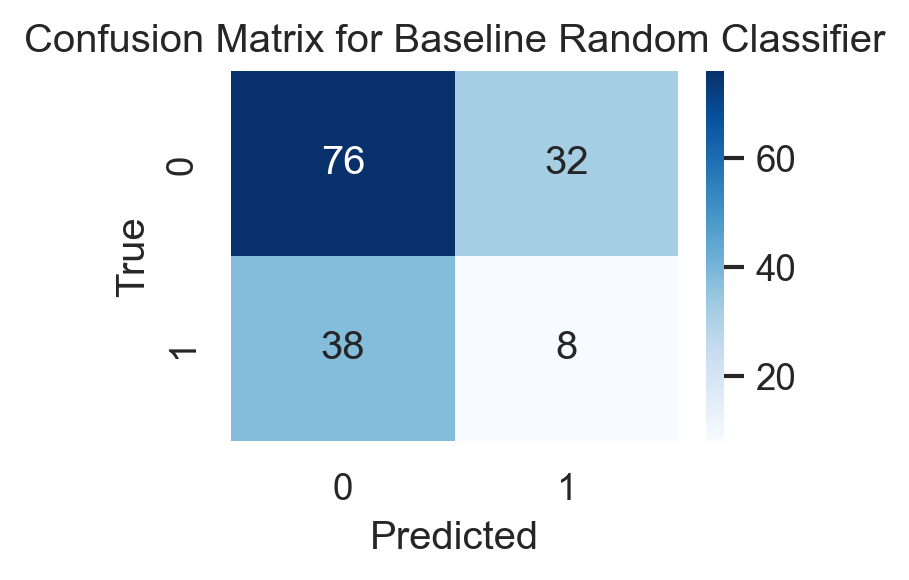

In [66]:
print("The Baseline Random Classifier Metrics:")
stratified_kfold_cv_and_metric(random_pl, X_train, y_train,"Baseline Random Classifier")

#### 2.5 Create a second baseline with SGD classifier

In [53]:
sgd_pl = Pipeline([
    ('preproc', preproc_pipeline),  # Preprocessing step
    ('sgd', SGDClassifier(loss = "log_loss",random_state=42)) # Classifier step
])

The Baseline SGD Classifier Metrics:


Accuracy - Mean: 0.9417, SD: 0.0542
Balanced Accuracy - Mean: 0.9427, SD: 0.0615
Recall - Mean: 0.9427, SD: 0.0615
Precision - Mean: 0.9382, SD: 0.0597
F1 Score - Mean: 0.9320, SD: 0.0634
AUC Score - Mean: 0.9762, SD: 0.0388
F-beta Score (beta=0.1) - Mean: 0.9379, SD: 0.0598
F-beta Score (beta=10) - Mean: 0.9423, SD: 0.0616


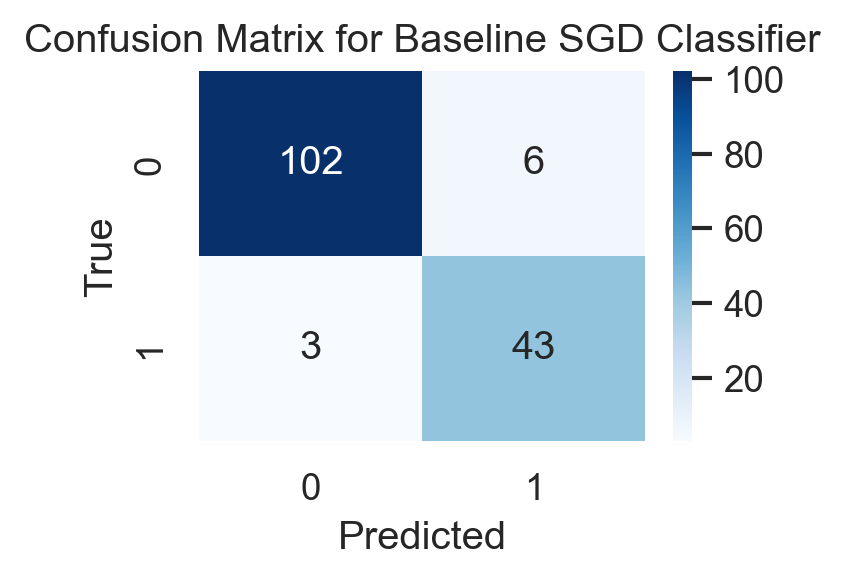

In [54]:
print("The Baseline SGD Classifier Metrics:")
stratified_kfold_cv_and_metric(sgd_pl, X_train, y_train, "Baseline SGD Classifier")

## 3. Model Optimisation

### 3.1 Performance metric

`Balanced Accuracy` is calculated as the average of sensitivity and specificity, effectively optimizing both to meet the client's requirements of more than 90% sensitivity and 80% specificity. Since the calculation of specificity involves the count of true negatives, `Balanced Accuracy` uniquely addresses both sensitivity and specificity.


### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

#### 3.2.1 Create a function in for hyper-parameter optimisation

In [55]:
def Stratified_grid_search(pipeline, param_grid, X_train, y_train, n_splits=10, random_state=42):
    # Define the stratified K-fold cross-validator
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Define the scoring function using balanced accuracy
    scorer = make_scorer(balanced_accuracy_score)
    
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=skf, verbose=1)
    
    # Perform the grid search
    grid_search.fit(X_train, y_train)
    
    print("Best Score:", grid_search.best_score_)
    print("Best Params:", grid_search.best_params_)

    return grid_search.best_estimator_


#### 3.2.2 Create a pipeline and parameters for Grid Search

#### SGD Classifier

In [57]:
SGD_pl = Pipeline([
    ('preproc', preproc_pipeline), 
    ('sgd', SGDClassifier(random_state=42))
])

SGD_param = {
    'sgd__max_iter': [10, 20, 50, 100],
    'sgd__tol': [1, 0.1, 0.01, 0.001],
    'sgd__loss': ['hinge', 'log_loss']
}

Best_SGD = Stratified_grid_search(SGD_pl, SGD_param, X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Score: 0.9518181818181819
Best Params: {'sgd__loss': 'log_loss', 'sgd__max_iter': 20, 'sgd__tol': 0.01}


The best SGD Classifier Metrics:
Accuracy - Mean: 0.9546, SD: 0.0421
Balanced Accuracy - Mean: 0.9518, SD: 0.0592
Recall - Mean: 0.9518, SD: 0.0592
Precision - Mean: 0.9508, SD: 0.0429
F1 Score - Mean: 0.9455, SD: 0.0525
AUC Score - Mean: 0.9744, SD: 0.0381
F-beta Score (beta=0.1) - Mean: 0.9506, SD: 0.0430
F-beta Score (beta=10) - Mean: 0.9516, SD: 0.0591


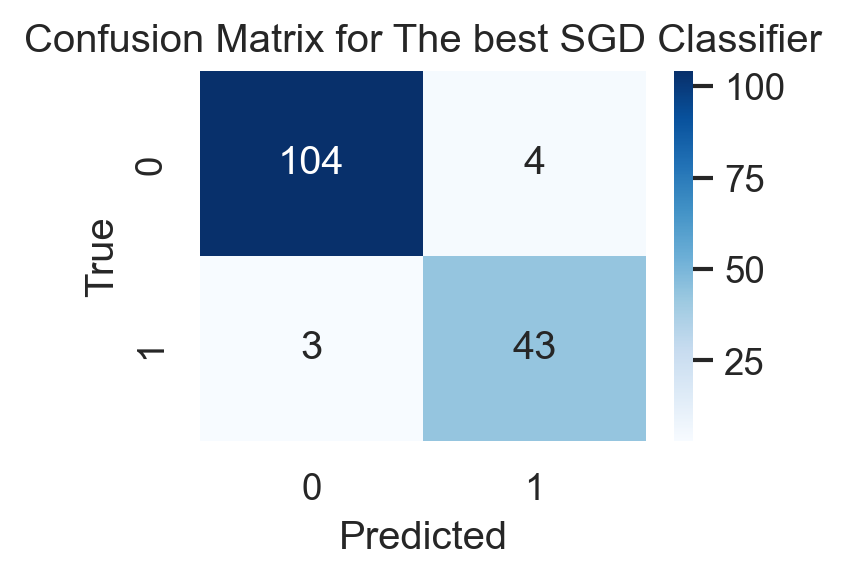

In [58]:
Best_SGD_pl = Pipeline([
    ('preproc', preproc_pipeline), 
    ('sgd', SGDClassifier(loss="log_loss", max_iter=20,tol=0.01,random_state=42))  
])

print("The best SGD Classifier Metrics:")
stratified_kfold_cv_and_metric(Best_SGD_pl, X_train, y_train, "The best SGD Classifier")

### SVC

In [59]:
SVC_pl = Pipeline([
    ('preproc', preproc_pipeline),  
    ('SVC', svm.SVC(random_state=42))  
])

SVC_param = {
    'SVC__C': [0.1, 0.5, 1, 2, 5, 20, 10, 50],
    'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

Best_SVC = Stratified_grid_search(SVC_pl, SVC_param, X_train, y_train)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Score: 0.9393181818181817
Best Params: {'SVC__C': 5, 'SVC__kernel': 'linear'}


The best SVC Classifier Metrics:
Accuracy - Mean: 0.9479, SD: 0.0579
Balanced Accuracy - Mean: 0.9393, SD: 0.0663
Recall - Mean: 0.9393, SD: 0.0663
Precision - Mean: 0.9438, SD: 0.0731
F1 Score - Mean: 0.9379, SD: 0.0689
AUC Score - Mean: 0.9393, SD: 0.0663
F-beta Score (beta=0.1) - Mean: 0.9436, SD: 0.0730
F-beta Score (beta=10) - Mean: 0.9392, SD: 0.0663


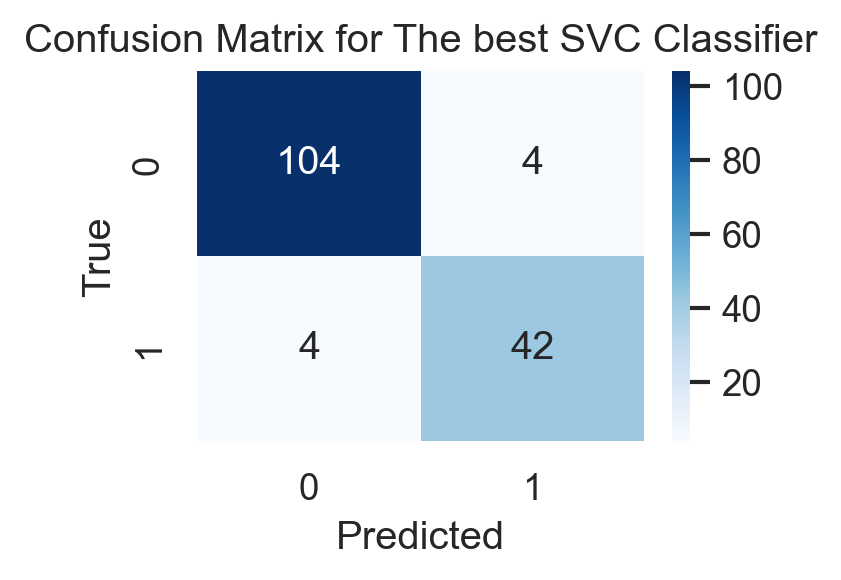

In [60]:
Best_SVC_pl = Pipeline([
    ('preproc', preproc_pipeline),  
    ('SVC', svm.SVC(C=5, kernel="linear",random_state=42))  
])

print("The best SVC Classifier Metrics:")
stratified_kfold_cv_and_metric(Best_SVC_pl, X_train, y_train, "The best SVC Classifier")

#### Random Forest Classifier

In [61]:
RF_pl = Pipeline([
    ('preproc', preproc_pipeline), 
    ('RF_clf', RandomForestClassifier(random_state=42))  
])

RF_param = {
            'RF_clf__n_estimators': [10, 25, 50, 100, 200], 
            'RF_clf__max_depth': [1, 2, 5, 10, 20, 40]
        }

Best_RF = Stratified_grid_search(RF_pl, RF_param, X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


Best Score: 0.9143181818181818
Best Params: {'RF_clf__max_depth': 10, 'RF_clf__n_estimators': 50}


The best Random Forest Classifier Metrics:
Accuracy - Mean: 0.9350, SD: 0.0517
Balanced Accuracy - Mean: 0.9143, SD: 0.0811
Recall - Mean: 0.9143, SD: 0.0811
Precision - Mean: 0.9313, SD: 0.0682
F1 Score - Mean: 0.9175, SD: 0.0728
AUC Score - Mean: 0.9700, SD: 0.0373
F-beta Score (beta=0.1) - Mean: 0.9309, SD: 0.0682
F-beta Score (beta=10) - Mean: 0.9143, SD: 0.0809


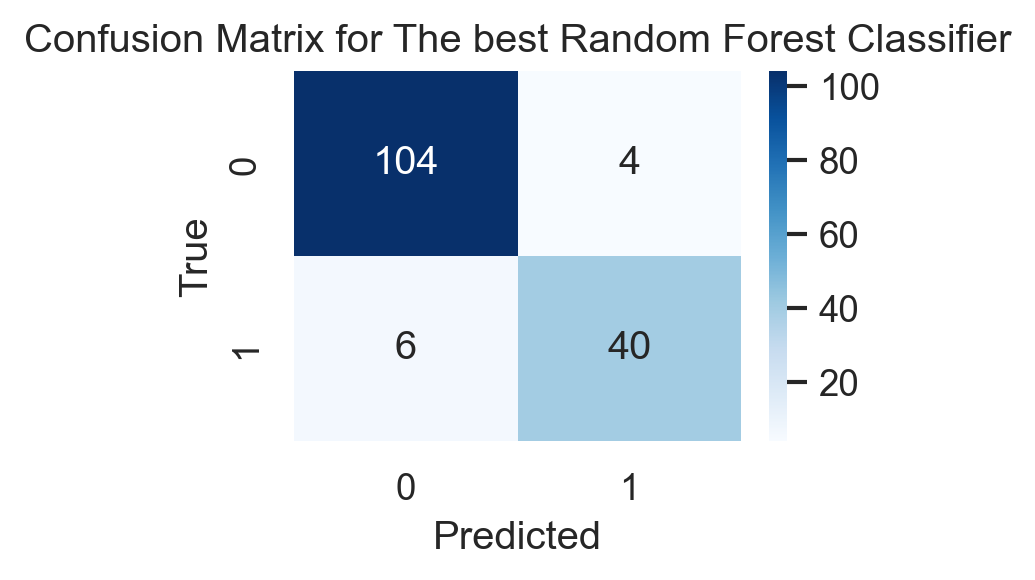

In [62]:
Best_RF_pl = Pipeline([
    ('preproc', preproc_pipeline), 
    ('RF_clf', RandomForestClassifier(max_depth=10, n_estimators=50,random_state=42))  
])

print("The best Random Forest Classifier Metrics:")
stratified_kfold_cv_and_metric(Best_RF_pl, X_train, y_train, "The best Random Forest Classifier")

#### Choosing the Best Model:
- The best model identified is the SGD Classifier.
- Optimal parameters are: `{'loss': 'log_loss', 'max_iter': 20, 'tol': 0.01}`.
- Justification:
    - Achieved the highest score in the grid search: 0.9518.
    - Demonstrated the highest mean recall: 0.9518.
    - Attained the best mean Balanced Accuracy: 0.9518.

#### 3.2.3 Implementing the Test Data in the Best Model

In [67]:
def test_evaluation_metrics(pl, X_train, y_train, X_test, y_test):
    pl.fit(X_train, y_train)
    y_pred = pl.predict(X_test)
    
    # Check if the model has predict_proba method
    if hasattr(pl, "predict_proba"):
        y_prob = pl.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
        auc_score = auc(fpr, tpr)
    else:
        y_prob = None
        auc_score = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("AUC Score:", auc_score)
    print("F-beta Score (beta=0.1):", f01_score(y_test, y_pred))
    print("F-beta Score (beta=10):", f10_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for The best SDG Classifier with test set')
    plt.show()

The best SDG Classifier Metrics with the test set:
Accuracy: 0.9696969696969697
Balanced Accuracy: 0.9641304347826087
Recall: 0.9641304347826087
Precision: 0.9641304347826087
F1 Score: 0.9641304347826087
AUC Score: 0.9978260869565218
F-beta Score (beta=0.1): 0.95
F-beta Score (beta=10): 0.9499999999999998


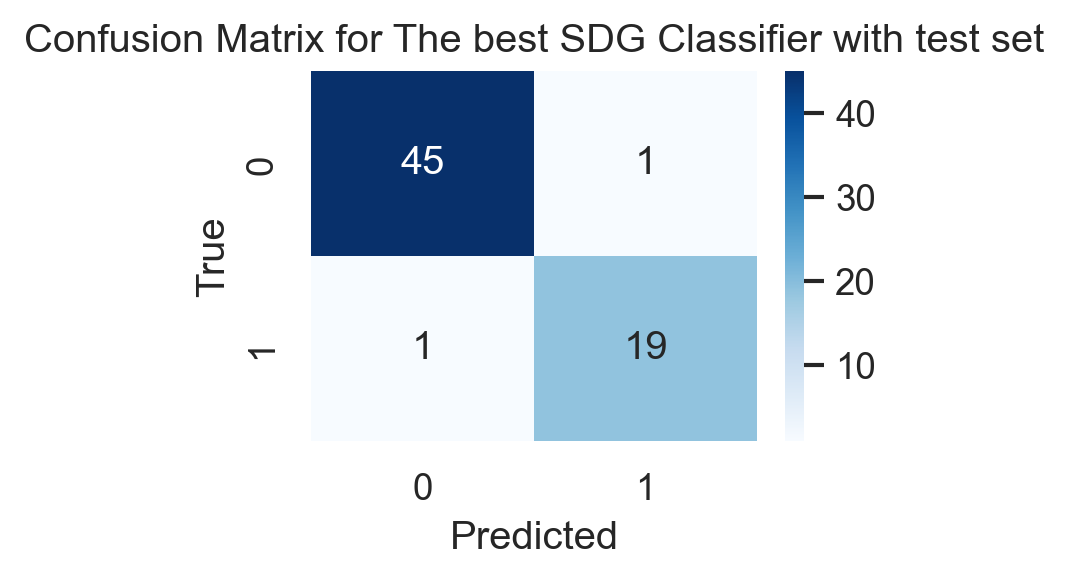

In [68]:
print("The best SDG Classifier Metrics with the test set:")
test_evaluation_metrics(Best_SGD_pl, X_train, y_train, X_test, y_test)

### 3.3 Final results

- The probability of person with a malignant tumour is given a result that they do not have cancer is $\frac{\text{False Negative}}{\text{False Negative} + \text{True Positive}}$ = $\frac {1} {19+1}$ = $\frac {1} {20}$